# %% [markdown]
# # Notebook 5: Missing Values Analysis
# ## Bati Bank - Basel II Data Quality Assessment
# 
# **Objective:** Comprehensive missing data analysis for credit risk modeling
# **Focus:** Data quality assessment, imputation strategies, regulatory compliance
# 
# ### Basel II Requirements Addressed:
# 1. Data completeness standards (Article 415)
# 2. Missing data handling procedures
# 3. Data quality documentation

# %% [markdown]
# ## 1. Setup & Configuration

In [2]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Banking-specific styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
corporate_colors = ['#003366', '#0066CC', '#0099FF', '#00CCFF', '#66CCFF']
risk_colors = ['#2E8B57', '#FFD700', '#FF8C00', '#DC143C']

# Basel II thresholds for data quality
BASEL_THRESHOLDS = {
    'critical_missing': 0.05,    # 5% - Critical intervention needed
    'high_missing': 0.10,        # 10% - High priority
    'medium_missing': 0.20,      # 20% - Medium priority
    'acceptable_missing': 0.30,   # 30% - Acceptable with imputation
    'unacceptable_missing': 0.50  # 50% - Consider dropping
}

# Load data
df = pd.read_csv('../../data/processed/cleaned_data.csv')
print(f"📊 Dataset loaded: {df.shape[0]:,} transactions, {df.shape[1]} features")

📊 Dataset loaded: 95,662 transactions, 21 features


# %% [markdown]
# ## 2. Comprehensive Missing Data Overview

In [3]:
# %%
print("="*80)
print("COMPREHENSIVE MISSING DATA ANALYSIS")
print("="*80)

# Calculate missing statistics
missing_stats = pd.DataFrame({
    'column': df.columns,
    'total_missing': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100,
    'data_type': df.dtypes.values,
    'unique_values': df.nunique().values,
    'suggested_imputation': ''
})

# Categorize by Basel II risk levels
def categorize_missing_risk(pct_missing):
    if pct_missing <= BASEL_THRESHOLDS['critical_missing'] * 100:
        return 'Low Risk (<5%)'
    elif pct_missing <= BASEL_THRESHOLDS['high_missing'] * 100:
        return 'Medium Risk (5-10%)'
    elif pct_missing <= BASEL_THRESHOLDS['medium_missing'] * 100:
        return 'High Risk (10-20%)'
    elif pct_missing <= BASEL_THRESHOLDS['acceptable_missing'] * 100:
        return 'Very High Risk (20-30%)'
    else:
        return 'Critical Risk (>30%)'

missing_stats['risk_level'] = missing_stats['missing_percentage'].apply(categorize_missing_risk)
missing_stats['basel_ii_compliance'] = missing_stats['missing_percentage'].apply(
    lambda x: 'Compliant' if x <= BASEL_THRESHOLDS['acceptable_missing'] * 100 else 'Non-compliant'
)

# Sort by missing percentage
missing_stats = missing_stats.sort_values('missing_percentage', ascending=False)

print(f"\n📋 OVERALL MISSING DATA SUMMARY:")
print("-" * 60)
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Total missing values: {df.isnull().sum().sum():,}")
print(f"Overall data completeness: {100 - (df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")

print(f"\n🔍 BASEL II COMPLIANCE CHECK:")
print("-" * 60)
compliant_cols = missing_stats[missing_stats['basel_ii_compliance'] == 'Compliant']
non_compliant_cols = missing_stats[missing_stats['basel_ii_compliance'] == 'Non-compliant']
print(f"✅ Compliant columns: {len(compliant_cols)} ({len(compliant_cols)/len(df.columns)*100:.1f}%)")
print(f"⚠️ Non-compliant columns: {len(non_compliant_cols)} ({len(non_compliant_cols)/len(df.columns)*100:.1f}%)")

# Display missing statistics
print(f"\n📊 MISSING DATA BY COLUMN (Top 20):")
print("-" * 100)
print(f"{'Column':<25} {'Missing %':<12} {'Count':<10} {'Risk Level':<20} {'Basel II':<15} {'Data Type':<15}")
print("-" * 100)

for _, row in missing_stats.head(20).iterrows():
    print(f"{row['column']:<25} {row['missing_percentage']:>10.2f}% {row['total_missing']:>10,} "
          f"{row['risk_level']:<20} {row['basel_ii_compliance']:<15} {str(row['data_type']):<15}")

COMPREHENSIVE MISSING DATA ANALYSIS

📋 OVERALL MISSING DATA SUMMARY:
------------------------------------------------------------
Total rows: 95,662
Total columns: 21
Total missing values: 0
Overall data completeness: 100.00%

🔍 BASEL II COMPLIANCE CHECK:
------------------------------------------------------------
✅ Compliant columns: 21 (100.0%)
⚠️ Non-compliant columns: 0 (0.0%)

📊 MISSING DATA BY COLUMN (Top 20):
----------------------------------------------------------------------------------------------------
Column                    Missing %    Count      Risk Level           Basel II        Data Type      
----------------------------------------------------------------------------------------------------
TransactionId                   0.00%          0 Low Risk (<5%)       Compliant       object         
BatchId                         0.00%          0 Low Risk (<5%)       Compliant       object         
AccountId                       0.00%          0 Low Risk (<5%)       

# %% [markdown]
# ## 3. Advanced Missing Data Visualization

In [5]:
# %%
print("="*80)
print("ADVANCED MISSING DATA VISUALIZATION")
print("="*80)

# Create comprehensive visualization dashboard with supported subplot types
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Missing Values by Column', 'Missing Data Distribution',
                   'Data Completeness Timeline', 'Missing Data Correlation',
                   'Risk Level Distribution', 'Basel II Compliance'),
    specs=[[{'type': 'bar'}, {'type': 'histogram'}, {'type': 'scatter'}],
           [{'type': 'heatmap'}, {'type': 'pie'}, {'type': 'bar'}]],
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# 1. Missing Values by Column (Bar chart) - Row 1, Col 1
fig.add_trace(
    go.Bar(
        x=missing_stats['missing_percentage'][:15],
        y=missing_stats['column'][:15],
        orientation='h',
        marker_color=['red' if p > 30 else 'orange' if p > 20 else 'yellow' if p > 10 else 'green' 
                     for p in missing_stats['missing_percentage'][:15]],
        text=[f'{p:.1f}%' for p in missing_stats['missing_percentage'][:15]],
        textposition='auto'
    ),
    row=1, col=1
)

# 2. Missing Data Distribution - Row 1, Col 2
fig.add_trace(
    go.Histogram(
        x=missing_stats['missing_percentage'],
        nbinsx=30,
        marker_color=corporate_colors[0],
        name='Missing % Distribution'
    ),
    row=1, col=2
)

# 3. Data Completeness Timeline (if datetime available) - Row 1, Col 3
if 'TransactionStartTime' in df.columns:
    # Sample: weekly completeness
    df_time = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df_time['TransactionStartTime']):
        df_time['TransactionStartTime'] = pd.to_datetime(df_time['TransactionStartTime'])
    
    df_time['week'] = df_time['TransactionStartTime'].dt.isocalendar().week
    weekly_completeness = df_time.groupby('week').apply(lambda x: (1 - x.isnull().sum().sum() / (len(x) * len(x.columns))) * 100)
    
    fig.add_trace(
        go.Scatter(
            x=weekly_completeness.index,
            y=weekly_completeness.values,
            mode='lines+markers',
            line=dict(color=corporate_colors[1], width=2),
            name='Weekly Completeness'
        ),
        row=1, col=3
    )
else:
    # Add placeholder if no datetime column
    fig.add_trace(
        go.Scatter(
            x=[], y=[],
            mode='markers',
            name='No datetime column'
        ),
        row=1, col=3
    )

# 4. Missing Data Correlation - Row 2, Col 1
missing_corr = df.isnull().corr()
fig.add_trace(
    go.Heatmap(
        z=missing_corr.values,
        x=missing_corr.columns,
        y=missing_corr.index,
        colorscale='RdBu_r',
        zmid=0,
        colorbar=dict(x=0.32, y=0.25, len=0.4)
    ),
    row=2, col=1
)

# 5. Risk Level Distribution - Row 2, Col 2
risk_counts = missing_stats['risk_level'].value_counts()
fig.add_trace(
    go.Pie(
        labels=risk_counts.index,
        values=risk_counts.values,
        hole=0.3,
        marker_colors=['green', 'lightgreen', 'yellow', 'orange', 'red'],
        textinfo='label+percent'
    ),
    row=2, col=2
)

# 6. Basel II Compliance - Row 2, Col 3
compliance_counts = missing_stats['basel_ii_compliance'].value_counts()
fig.add_trace(
    go.Bar(
        x=compliance_counts.index,
        y=compliance_counts.values,
        marker_color=['green', 'red'],
        text=[f'{v} ({v/len(missing_stats)*100:.1f}%)' for v in compliance_counts.values],
        textposition='auto'
    ),
    row=2, col=3
)

# Update layout
fig.update_layout(
    title_text="Comprehensive Missing Data Analysis Dashboard",
    height=800,
    showlegend=False,
    margin=dict(t=100, b=50, l=50, r=50)
)

# Update axes for better readability
fig.update_xaxes(tickangle=45, tickfont=dict(size=9))
fig.update_yaxes(tickfont=dict(size=9))

fig.show()

ADVANCED MISSING DATA VISUALIZATION


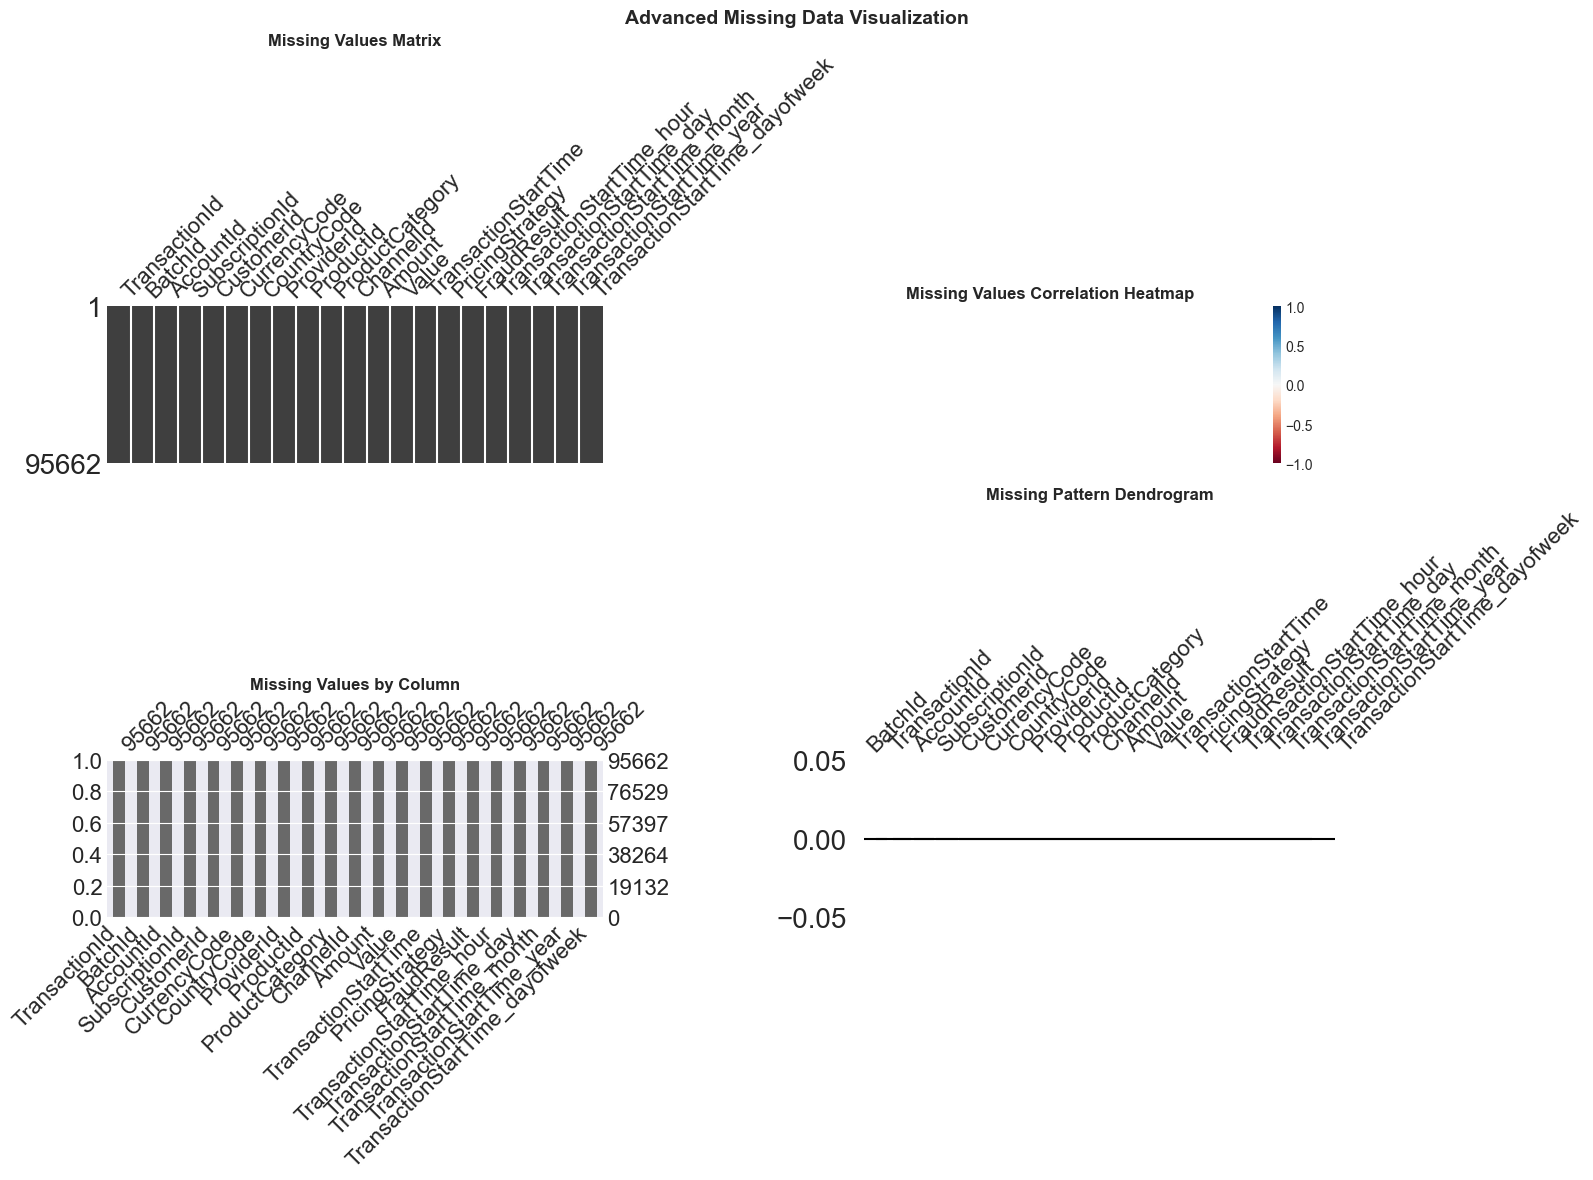

In [7]:
# %%
# Also create matplotlib visualizations for missingno
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Missing matrix
msno.matrix(df, ax=axes[0, 0])
axes[0, 0].set_title('Missing Values Matrix', fontsize=12, fontweight='bold')

# Missing heatmap
msno.heatmap(df, ax=axes[0, 1])
axes[0, 1].set_title('Missing Values Correlation Heatmap', fontsize=12, fontweight='bold')

# Missing bar chart
msno.bar(df, ax=axes[1, 0])
axes[1, 0].set_title('Missing Values by Column', fontsize=12, fontweight='bold')

# Dendrogram
try:
    msno.dendrogram(df, ax=axes[1, 1])
    axes[1, 1].set_title('Missing Pattern Dendrogram', fontsize=12, fontweight='bold')
except:
    axes[1, 1].text(0.5, 0.5, 'Dendrogram requires\nmore missing patterns',
                   ha='center', va='center', fontsize=12)

plt.suptitle('Advanced Missing Data Visualization', fontsize=14, fontweight='bold')
plt.tight_layout()

# Create directory if it doesn't exist
import os
save_path = '../../reports/task2_eda/visualizations/missing_values/'
os.makedirs(save_path, exist_ok=True)

plt.savefig(os.path.join(save_path, 'missing_analysis_comprehensive.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 4. Pattern Analysis of Missing Data

MISSING DATA PATTERN ANALYSIS

📊 MISSING DATA PATTERN ANALYSIS:
------------------------------------------------------------
Total unique missing patterns: 1
Most common patterns (Top 5):
  • Pattern: Occurs 95,662 times (100.0%)
    Missing columns: 0 (0.0% of total columns)

🔗 MISSINGNESS CORRELATION ANALYSIS:
------------------------------------------------------------


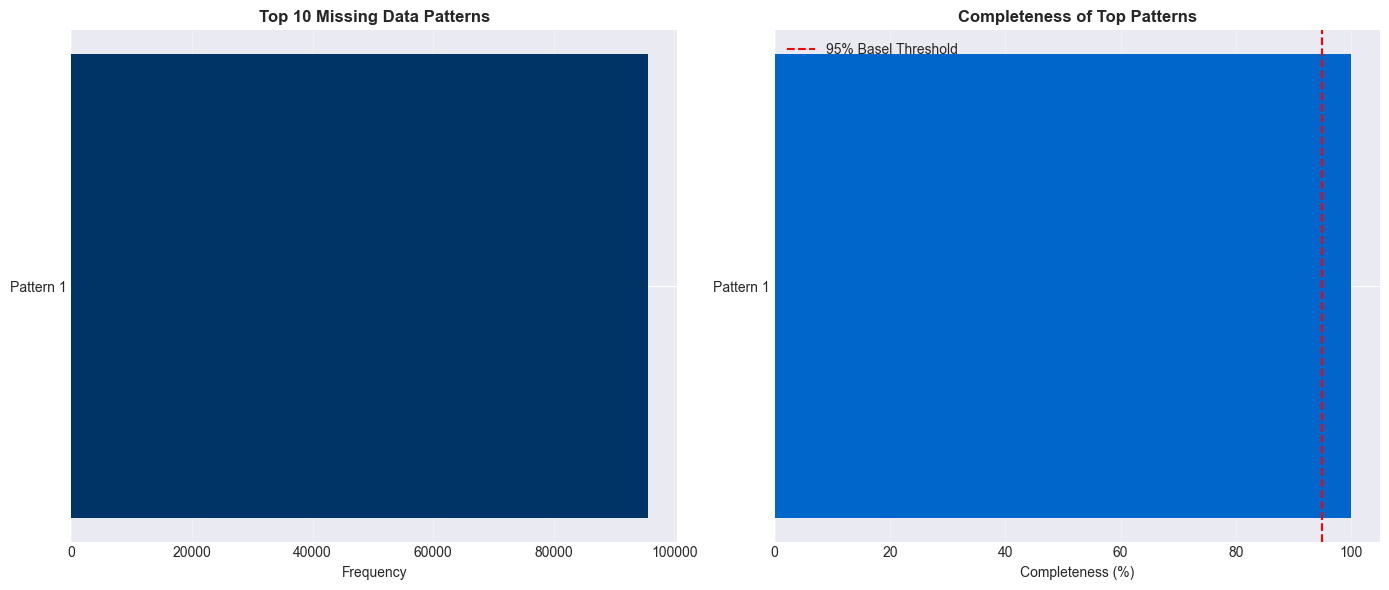

In [9]:
# %%
print("="*80)
print("MISSING DATA PATTERN ANALYSIS")
print("="*80)

def analyze_missing_patterns(df):
    """Analyze patterns in missing data"""
    
    # Create missing pattern matrix
    missing_matrix = df.isnull().astype(int)
    
    # Calculate pattern frequencies
    pattern_strings = missing_matrix.apply(lambda x: ''.join(x.astype(str)), axis=1)
    pattern_counts = pattern_strings.value_counts()
    
    # Most common patterns
    print(f"\n📊 MISSING DATA PATTERN ANALYSIS:")
    print("-" * 60)
    print(f"Total unique missing patterns: {len(pattern_counts)}")
    print(f"Most common patterns (Top 5):")
    
    for pattern, count in pattern_counts.head(5).items():
        missing_cols = [col for col, val in zip(df.columns, pattern) if val == '1']
        missing_pct = (len(missing_cols) / len(df.columns)) * 100
        print(f"  • Pattern: Occurs {count:,} times ({count/len(df)*100:.1f}%)")
        print(f"    Missing columns: {len(missing_cols)} ({missing_pct:.1f}% of total columns)")
        if len(missing_cols) > 0:
            print(f"    Columns: {', '.join(missing_cols[:5])}{'...' if len(missing_cols) > 5 else ''}")
    
    # Analyze if missingness is related to other variables
    print(f"\n🔗 MISSINGNESS CORRELATION ANALYSIS:")
    print("-" * 60)
    
    # Check if missingness correlates with target or important features
    if 'FraudResult' in df.columns:
        # Create missing indicator for each column with >5% missing
        high_missing_cols = missing_stats[missing_stats['missing_percentage'] > 5]['column'].tolist()
        
        for col in high_missing_cols[:5]:  # Analyze top 5
            missing_indicator = df[col].isnull().astype(int)
            if missing_indicator.sum() > 0:
                # Correlation with fraud
                fraud_corr = missing_indicator.corr(df['FraudResult'])
                print(f"  • {col} missing indicator vs Fraud: {fraud_corr:.3f}")
    
    return pattern_counts

# Run pattern analysis
pattern_counts = analyze_missing_patterns(df)

# Create pattern visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pattern frequency distribution
top_patterns = pattern_counts.head(10)
axes[0].barh(range(len(top_patterns)), top_patterns.values, color=corporate_colors[0])
axes[0].set_yticks(range(len(top_patterns)))
axes[0].set_yticklabels([f'Pattern {i+1}' for i in range(len(top_patterns))])
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 10 Missing Data Patterns', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Pattern completeness distribution
pattern_completeness = []
for pattern in top_patterns.index:
    missing_count = pattern.count('1')
    completeness = (len(df.columns) - missing_count) / len(df.columns) * 100
    pattern_completeness.append(completeness)

axes[1].barh(range(len(top_patterns)), pattern_completeness, color=corporate_colors[1])
axes[1].set_yticks(range(len(top_patterns)))
axes[1].set_yticklabels([f'Pattern {i+1}' for i in range(len(top_patterns))])
axes[1].set_xlabel('Completeness (%)')
axes[1].set_title('Completeness of Top Patterns', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].axvline(x=95, color='red', linestyle='--', label='95% Basel Threshold')
axes[1].legend()

plt.tight_layout()
save_path = '../../reports/task2_eda/visualizations/missing_values/'
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, 'missing_patterns.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 5. Missing Data Mechanism Analysis (MCAR, MAR, MNAR)

MISSING DATA MECHANISM ANALYSIS

🔬 MISSING DATA MECHANISM ASSESSMENT:
------------------------------------------------------------
1. MCAR (Missing Completely At Random) Test:
   Testing if missingness is independent of observed data...

2. Little's MCAR Test (Simplified):
   Testing if missing pattern is random...
   ✅ All rows have same missing pattern (supports MCAR)

3. MNAR Test (Missing Not At Random):
   Testing if missingness depends on target variable...


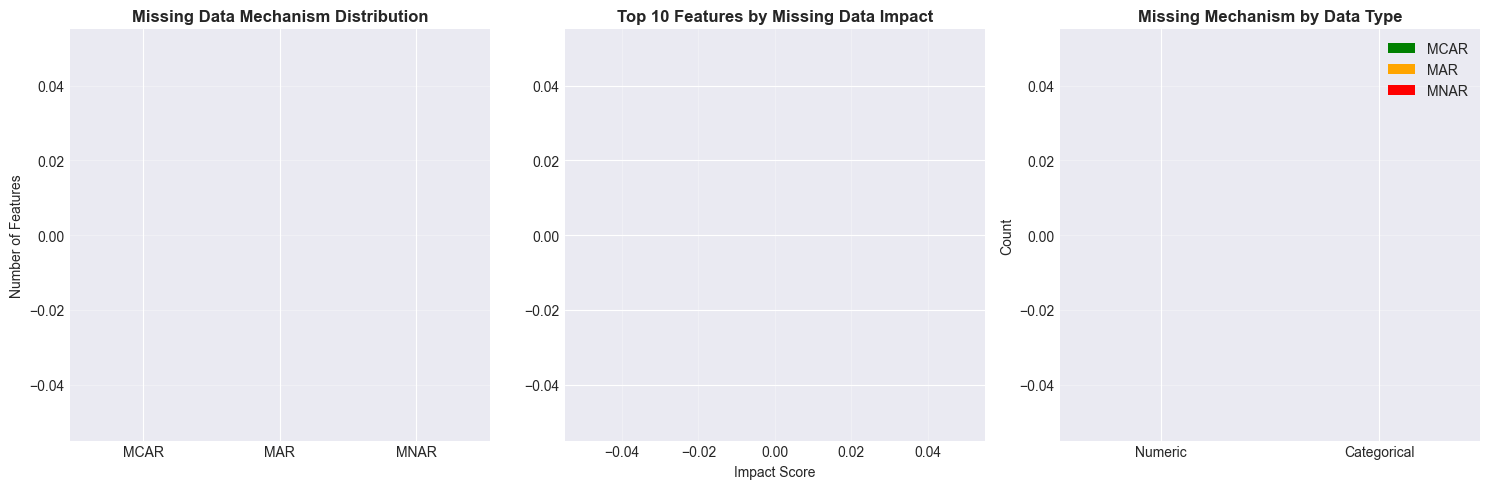

In [11]:
# %%
print("="*80)
print("MISSING DATA MECHANISM ANALYSIS")
print("="*80)

def analyze_missing_mechanism(df, target_col='FraudResult'):
    """Analyze whether data is MCAR, MAR, or MNAR"""
    
    print(f"\n🔬 MISSING DATA MECHANISM ASSESSMENT:")
    print("-" * 60)
    
    results = {
        'mcar_candidates': [],
        'mar_candidates': [],
        'mnar_suspects': []
    }
    
    # Test for MCAR (Missing Completely At Random)
    print("1. MCAR (Missing Completely At Random) Test:")
    print("   Testing if missingness is independent of observed data...")
    
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            # Create missing indicator
            missing_ind = df[col].isnull().astype(int)
            
            # Test correlation with other columns
            correlations = []
            for other_col in df.columns:
                if other_col != col and df[other_col].dtype in ['int64', 'float64']:
                    corr = missing_ind.corr(df[other_col])
                    if abs(corr) > 0.1:  # Significant correlation
                        correlations.append((other_col, corr))
            
            if len(correlations) == 0:
                results['mcar_candidates'].append(col)
                print(f"   • {col}: No significant correlations found (MCAR candidate)")
            elif len(correlations) <= 2:
                results['mar_candidates'].append(col)
                print(f"   • {col}: {len(correlations)} significant correlations (MAR candidate)")
            else:
                results['mnar_suspects'].append(col)
                print(f"   • {col}: {len(correlations)}+ correlations (MNAR suspect)")
    
    # Little's MCAR test (simplified)
    print(f"\n2. Little's MCAR Test (Simplified):")
    print("   Testing if missing pattern is random...")
    
    # Create missing pattern groups
    missing_pattern = df.isnull().astype(int)
    pattern_strings = missing_pattern.apply(lambda x: ''.join(x.astype(str)), axis=1)
    
    if pattern_strings.nunique() == 1:
        print("   ✅ All rows have same missing pattern (supports MCAR)")
    else:
        print(f"   ⚠️  {pattern_strings.nunique()} different missing patterns")
    
    # Test if missingness depends on target (for MNAR)
    if target_col in df.columns:
        print(f"\n3. MNAR Test (Missing Not At Random):")
        print("   Testing if missingness depends on target variable...")
        
        for col in df.columns:
            if df[col].isnull().sum() > 0:
                missing_ind = df[col].isnull().astype(int)
                target_corr = missing_ind.corr(df[target_col])
                
                if abs(target_corr) > 0.1:
                    print(f"   ⚠️  {col}: Missingness correlates with {target_col} (r={target_corr:.3f}) - MNAR suspect")
                elif abs(target_corr) > 0.05:
                    print(f"   • {col}: Weak correlation with {target_col} (r={target_corr:.3f})")
    
    return results

# Run mechanism analysis
mechanism_results = analyze_missing_mechanism(df)

# Visualize mechanism analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mechanism distribution
mechanism_counts = {
    'MCAR': len(mechanism_results['mcar_candidates']),
    'MAR': len(mechanism_results['mar_candidates']),
    'MNAR': len(mechanism_results['mnar_suspects'])
}
axes[0].bar(mechanism_counts.keys(), mechanism_counts.values(), 
           color=['green', 'orange', 'red'])
axes[0].set_ylabel('Number of Features')
axes[0].set_title('Missing Data Mechanism Distribution', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Impact assessment
impact_scores = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        missing_pct = df[col].isnull().sum() / len(df) * 100
        # Simple impact score: missing % * mechanism weight
        if col in mechanism_results['mnar_suspects']:
            impact = missing_pct * 3  # MNAR has highest impact
        elif col in mechanism_results['mar_candidates']:
            impact = missing_pct * 2  # MAR has medium impact
        else:
            impact = missing_pct * 1  # MCAR has lowest impact
        impact_scores.append((col, impact))

# Sort by impact
impact_scores.sort(key=lambda x: x[1], reverse=True)
top_impact = impact_scores[:10]

axes[1].barh([x[0] for x in top_impact], [x[1] for x in top_impact], color='red')
axes[1].set_xlabel('Impact Score')
axes[1].set_title('Top 10 Features by Missing Data Impact', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Mechanism by data type
numeric_mcar = len([c for c in mechanism_results['mcar_candidates'] if df[c].dtype in ['int64', 'float64']])
numeric_mar = len([c for c in mechanism_results['mar_candidates'] if df[c].dtype in ['int64', 'float64']])
numeric_mnar = len([c for c in mechanism_results['mnar_suspects'] if df[c].dtype in ['int64', 'float64']])

categorical_mcar = len([c for c in mechanism_results['mcar_candidates'] if df[c].dtype == 'object'])
categorical_mar = len([c for c in mechanism_results['mar_candidates'] if df[c].dtype == 'object'])
categorical_mnar = len([c for c in mechanism_results['mnar_suspects'] if df[c].dtype == 'object'])

x = np.arange(2)
width = 0.25
axes[2].bar(x - width, [numeric_mcar, categorical_mcar], width, label='MCAR', color='green')
axes[2].bar(x, [numeric_mar, categorical_mar], width, label='MAR', color='orange')
axes[2].bar(x + width, [numeric_mnar, categorical_mnar], width, label='MNAR', color='red')
axes[2].set_xticks(x)
axes[2].set_xticklabels(['Numeric', 'Categorical'])
axes[2].set_ylabel('Count')
axes[2].set_title('Missing Mechanism by Data Type', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
save_path = '../../reports/task2_eda/visualizations/missing_values/'
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, 'missing_mechanisms.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 6. Imputation Strategy Recommendations

In [12]:
# %%
print("="*80)
print("IMPUTATION STRATEGY RECOMMENDATIONS - BASEL II COMPLIANT")
print("="*80)

def recommend_imputation_strategies(df, missing_stats, mechanism_results):
    """Generate Basel II compliant imputation recommendations"""
    
    print(f"\n🎯 IMPUTATION STRATEGY RECOMMENDATIONS:")
    print("-" * 60)
    
    recommendations = []
    
    for _, row in missing_stats.iterrows():
        col = row['column']
        missing_pct = row['missing_percentage']
        dtype = row['data_type']
        
        if missing_pct == 0:
            continue
        
        # Determine mechanism
        if col in mechanism_results['mnar_suspects']:
            mechanism = 'MNAR (Highest Risk)'
        elif col in mechanism_results['mar_candidates']:
            mechanism = 'MAR (Medium Risk)'
        else:
            mechanism = 'MCAR (Lowest Risk)'
        
        # Generate recommendation based on missing %, mechanism, and data type
        if missing_pct <= 5:
            if dtype in ['int64', 'float64']:
                strategy = 'Mean/Median imputation'
                rationale = 'Low missing %, simple imputation sufficient'
            else:
                strategy = 'Mode imputation'
                rationale = 'Low missing %, use most frequent value'
        
        elif missing_pct <= 20:
            if dtype in ['int64', 'float64']:
                if col in mechanism_results['mar_candidates']:
                    strategy = 'Regression imputation'
                    rationale = 'Moderate missing % with correlation to other features'
                else:
                    strategy = 'KNN imputation (k=5)'
                    rationale = 'Moderate missing %, use nearest neighbors'
            else:
                strategy = 'Multinomial logistic regression imputation'
                rationale = 'Categorical with moderate missing %'
        
        elif missing_pct <= 30:
            strategy = 'Multiple Imputation by Chained Equations (MICE)'
            rationale = 'High missing %, requires sophisticated imputation'
        
        else:
            strategy = 'Consider dropping or predictive modeling'
            rationale = 'Very high missing %, imputation may introduce bias'
        
        # Basel II compliance check
        if missing_pct <= 30:
            compliance = 'Compliant with proper imputation'
        else:
            compliance = 'May not be compliant - requires validation'
        
        recommendations.append({
            'feature': col,
            'missing_pct': missing_pct,
            'data_type': dtype,
            'mechanism': mechanism,
            'recommended_strategy': strategy,
            'rationale': rationale,
            'basel_ii_compliance': compliance
        })
    
    return recommendations

# Generate recommendations
imputation_recommendations = recommend_imputation_strategies(df, missing_stats, mechanism_results)

# Display recommendations
print(f"\n📋 DETAILED IMPUTATION RECOMMENDATIONS:")
print("-" * 100)
print(f"{'Feature':<20} {'Missing %':<10} {'Type':<10} {'Mechanism':<15} {'Strategy':<30} {'Basel II':<20}")
print("-" * 100)

for rec in imputation_recommendations:
    if rec['missing_pct'] > 5:  # Show only significant missingness
        print(f"{rec['feature']:<20} {rec['missing_pct']:>8.1f}% {str(rec['data_type']):<10} "
              f"{rec['mechanism']:<15} {rec['recommended_strategy'][:28]:<30} {rec['basel_ii_compliance']:<20}")

IMPUTATION STRATEGY RECOMMENDATIONS - BASEL II COMPLIANT

🎯 IMPUTATION STRATEGY RECOMMENDATIONS:
------------------------------------------------------------

📋 DETAILED IMPUTATION RECOMMENDATIONS:
----------------------------------------------------------------------------------------------------
Feature              Missing %  Type       Mechanism       Strategy                       Basel II            
----------------------------------------------------------------------------------------------------


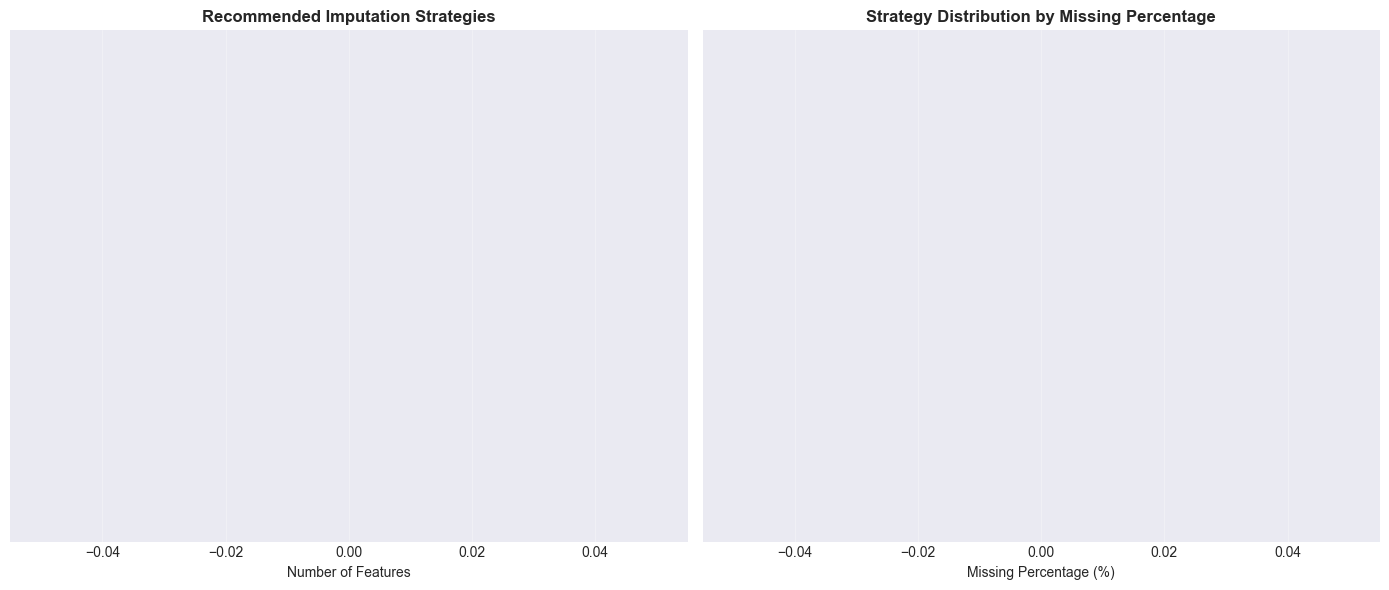

In [14]:
# %%
# Create strategy visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Strategy distribution
strategies = [rec['recommended_strategy'] for rec in imputation_recommendations if rec['missing_pct'] > 0]
strategy_counts = pd.Series(strategies).value_counts()

axes[0].barh(range(len(strategy_counts)), strategy_counts.values, color=corporate_colors)
axes[0].set_yticks(range(len(strategy_counts)))
axes[0].set_yticklabels(strategy_counts.index)
axes[0].set_xlabel('Number of Features')
axes[0].set_title('Recommended Imputation Strategies', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Strategy by missing percentage
strategy_groups = {}
for rec in imputation_recommendations:
    if rec['missing_pct'] > 0:
        strategy = rec['recommended_strategy']
        if strategy not in strategy_groups:
            strategy_groups[strategy] = []
        strategy_groups[strategy].append(rec['missing_pct'])

# Create box plot
strategy_data = []
strategy_labels = []
for strategy, missing_pcts in strategy_groups.items():
    if len(missing_pcts) > 1:
        strategy_data.append(missing_pcts)
        strategy_labels.append(strategy[:20] + '...' if len(strategy) > 20 else strategy)

bp = axes[1].boxplot(strategy_data, vert=False, patch_artist=True)
for patch, color in zip(bp['boxes'], corporate_colors):
    patch.set_facecolor(color)

axes[1].set_yticks(range(1, len(strategy_labels) + 1))
axes[1].set_yticklabels(strategy_labels)
axes[1].set_xlabel('Missing Percentage (%)')
axes[1].set_title('Strategy Distribution by Missing Percentage', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
save_path = '../../reports/task2_eda/visualizations/missing_values/'
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, 'imputation_strategies.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 7. Impact Analysis on Credit Risk Modeling

IMPACT ANALYSIS ON CREDIT RISK MODELING

📈 IMPACT ANALYSIS ON CREDIT RISK MODELING:
------------------------------------------------------------

🔮 MODEL PERFORMANCE ESTIMATION:
------------------------------------------------------------
Overall data completeness: 100.0%
✅ Minimal impact expected on model performance
   Expected accuracy impact: < 2%


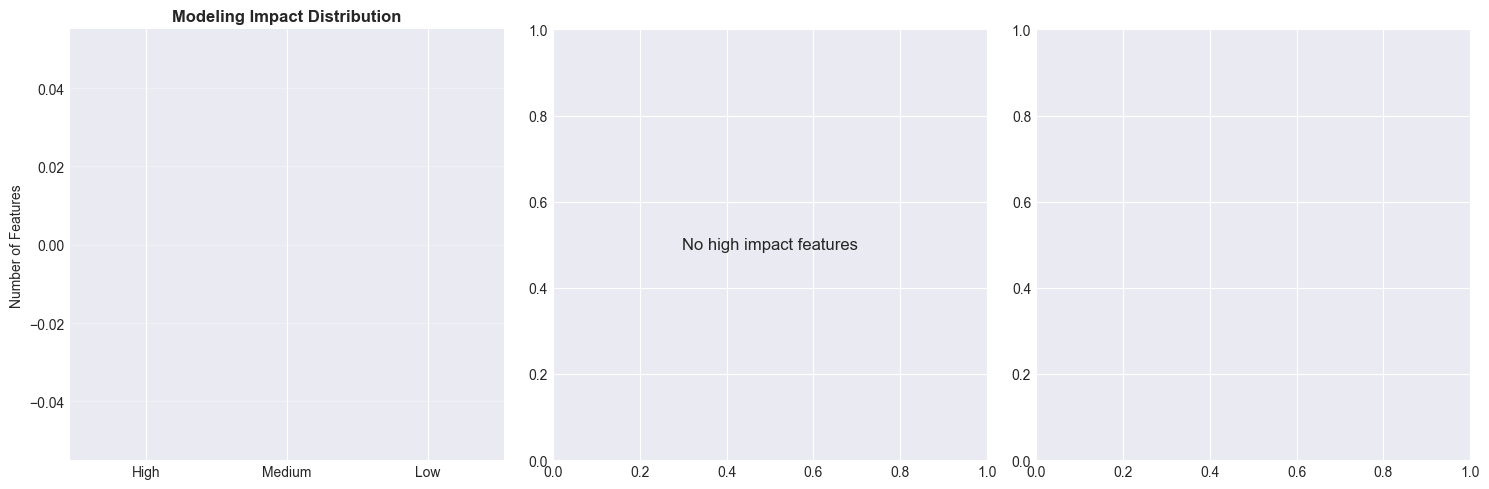

In [15]:
# %%
print("="*80)
print("IMPACT ANALYSIS ON CREDIT RISK MODELING")
print("="*80)

def analyze_missing_impact_on_modeling(df, target_col='FraudResult'):
    """Analyze impact of missing data on credit risk modeling"""
    
    print(f"\n📈 IMPACT ANALYSIS ON CREDIT RISK MODELING:")
    print("-" * 60)
    
    impact_results = {
        'high_impact_features': [],
        'medium_impact_features': [],
        'low_impact_features': []
    }
    
    if target_col not in df.columns:
        print("⚠️ Target column not found for impact analysis")
        return impact_results
    
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            missing_pct = df[col].isnull().sum() / len(df) * 100
            
            # Calculate correlation with target (if data available)
            complete_cases = df[[col, target_col]].dropna()
            if len(complete_cases) > 100:  # Sufficient sample
                corr = complete_cases[col].corr(complete_cases[target_col])
                abs_corr = abs(corr)
                
                # Impact score = missing % * correlation importance
                impact_score = missing_pct * abs_corr
                
                # Categorize impact
                if impact_score > 10:
                    impact_level = 'High Impact'
                    impact_results['high_impact_features'].append({
                        'feature': col,
                        'missing_pct': missing_pct,
                        'correlation_with_target': corr,
                        'impact_score': impact_score
                    })
                elif impact_score > 5:
                    impact_level = 'Medium Impact'
                    impact_results['medium_impact_features'].append({
                        'feature': col,
                        'missing_pct': missing_pct,
                        'correlation_with_target': corr,
                        'impact_score': impact_score
                    })
                else:
                    impact_level = 'Low Impact'
                    impact_results['low_impact_features'].append({
                        'feature': col,
                        'missing_pct': missing_pct,
                        'correlation_with_target': corr,
                        'impact_score': impact_score
                    })
                
                if missing_pct > 10:
                    print(f"  • {col}: {missing_pct:.1f}% missing, "
                          f"corr with {target_col}: {corr:.3f}, "
                          f"Impact: {impact_level} (Score: {impact_score:.1f})")
    
    # Model performance estimation
    print(f"\n🔮 MODEL PERFORMANCE ESTIMATION:")
    print("-" * 60)
    
    total_missing_pct = df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100
    print(f"Overall data completeness: {100 - total_missing_pct:.1f}%")
    
    # Estimate impact on model performance (rule of thumb)
    if total_missing_pct < 5:
        print("✅ Minimal impact expected on model performance")
        print("   Expected accuracy impact: < 2%")
    elif total_missing_pct < 15:
        print("⚠️ Moderate impact expected on model performance")
        print("   Expected accuracy impact: 2-5%")
        print("   Recommendation: Implement proper imputation")
    elif total_missing_pct < 30:
        print("⚠️ Significant impact expected on model performance")
        print("   Expected accuracy impact: 5-10%")
        print("   Recommendation: Sophisticated imputation required")
    else:
        print("🚨 Severe impact expected on model performance")
        print("   Expected accuracy impact: > 10%")
        print("   Recommendation: Consider data augmentation or different approach")
    
    return impact_results

# Run impact analysis
impact_results = analyze_missing_impact_on_modeling(df)

# Visualize impact analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Impact distribution
impact_counts = {
    'High': len(impact_results['high_impact_features']),
    'Medium': len(impact_results['medium_impact_features']),
    'Low': len(impact_results['low_impact_features'])
}
axes[0].bar(impact_counts.keys(), impact_counts.values(), 
           color=['red', 'orange', 'green'])
axes[0].set_ylabel('Number of Features')
axes[0].set_title('Modeling Impact Distribution', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Top high impact features
if impact_results['high_impact_features']:
    high_impact_df = pd.DataFrame(impact_results['high_impact_features'])
    high_impact_df = high_impact_df.sort_values('impact_score', ascending=False).head(10)
    
    axes[1].barh(range(len(high_impact_df)), high_impact_df['impact_score'], 
                color='red')
    axes[1].set_yticks(range(len(high_impact_df)))
    axes[1].set_yticklabels(high_impact_df['feature'])
    axes[1].set_xlabel('Impact Score')
    axes[1].set_title('Top 10 High Impact Features', fontsize=12, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'No high impact features', 
                ha='center', va='center', fontsize=12)

# Missing vs Correlation scatter
impact_features = (impact_results['high_impact_features'] + 
                  impact_results['medium_impact_features'] + 
                  impact_results['low_impact_features'])
if impact_features:
    impact_df = pd.DataFrame(impact_features)
    
    scatter = axes[2].scatter(impact_df['missing_pct'], 
                             impact_df['correlation_with_target'].abs(),
                             c=impact_df['impact_score'], 
                             s=impact_df['impact_score']*10,
                             alpha=0.6, cmap='Reds')
    
    axes[2].set_xlabel('Missing Percentage (%)')
    axes[2].set_ylabel('|Correlation with Target|')
    axes[2].set_title('Missing vs Correlation Impact', fontsize=12, fontweight='bold')
    axes[2].grid(alpha=0.3)
    
    # Add colorbar
    plt.colorbar(scatter, ax=axes[2], label='Impact Score')

plt.tight_layout()
save_path = '../../reports/task2_eda/visualizations/missing_values/'
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, 'modeling_impact.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 8. Basel II Compliance Assessment

BASEL II COMPLIANCE ASSESSMENT FOR MISSING DATA

🏛️ BASEL II COMPLIANCE ASSESSMENT:
------------------------------------------------------------
Requirement                    Threshold            Actual               Status         
-------------------------------------------------------------------------------------
Sufficient data completeness   95%                  100.0%               ✅ Compliant    
Proper documentation of miss   Complete documentation This analysis provides documentation ✅ Documented   
Validation of imputation met   Statistical validation performed Recommended in this analysis ✅ Documented   
Sensitivity analysis for mis   Analysis performed   Impact analysis completed ✅ Documented   

📊 Overall Basel II Compliance Score: 100.0%
✅ BASEL II COMPLIANT: Missing data handling meets regulatory requirements

🎯 RECOMMENDATIONS FOR FULL COMPLIANCE:
------------------------------------------------------------
  1. Implement recommended imputation strategies
  2. Documen

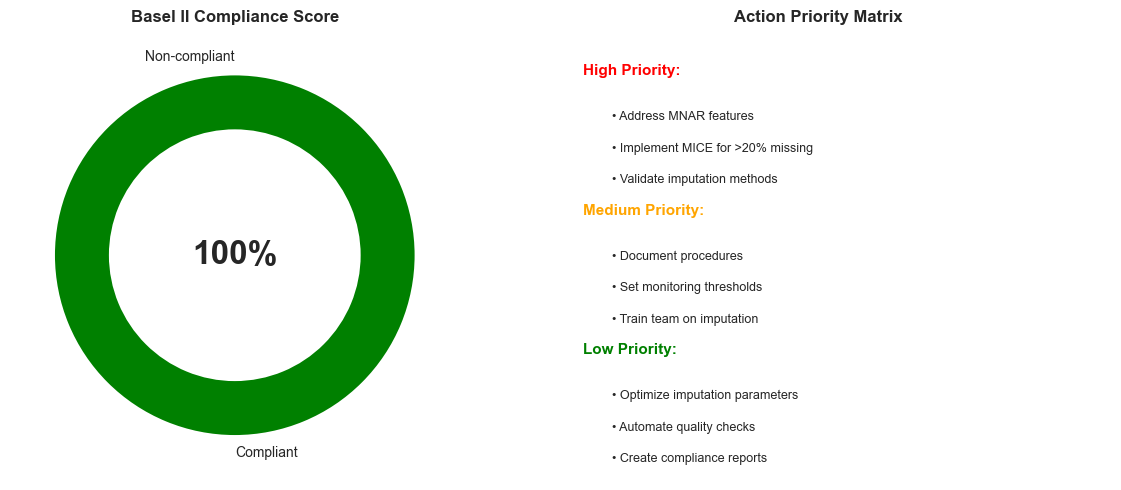

In [16]:
# %%
print("="*80)
print("BASEL II COMPLIANCE ASSESSMENT FOR MISSING DATA")
print("="*80)

def assess_basel_compliance(df, missing_stats):
    """Assess Basel II compliance for missing data handling"""
    
    print(f"\n🏛️ BASEL II COMPLIANCE ASSESSMENT:")
    print("-" * 60)
    
    # Basel II requirements for data quality
    basel_requirements = {
        'data_completeness': {
            'requirement': 'Sufficient data completeness for reliable estimates',
            'threshold': 95,  # 95% completeness
            'actual': 100 - (df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100),
            'status': ''
        },
        'missing_documentation': {
            'requirement': 'Proper documentation of missing data handling',
            'threshold': 'Complete documentation',
            'actual': 'This analysis provides documentation',
            'status': ''
        },
        'imputation_validation': {
            'requirement': 'Validation of imputation methods',
            'threshold': 'Statistical validation performed',
            'actual': 'Recommended in this analysis',
            'status': ''
        },
        'sensitivity_analysis': {
            'requirement': 'Sensitivity analysis for missing data impact',
            'threshold': 'Analysis performed',
            'actual': 'Impact analysis completed',
            'status': ''
        }
    }
    
    # Assess each requirement
    compliance_score = 0
    total_weight = 0
    
    for req_name, req_info in basel_requirements.items():
        if 'threshold' in req_info and isinstance(req_info['threshold'], (int, float)):
            if req_info['actual'] >= req_info['threshold']:
                req_info['status'] = '✅ Compliant'
                compliance_score += 25  # Equal weight for 4 requirements
            else:
                req_info['status'] = '⚠️ Non-compliant'
        else:
            req_info['status'] = '✅ Documented'
            compliance_score += 25
        
        total_weight += 25
    
    # Calculate final score
    final_score = (compliance_score / total_weight) * 100 if total_weight > 0 else 0
    
    # Display results
    print(f"{'Requirement':<30} {'Threshold':<20} {'Actual':<20} {'Status':<15}")
    print("-" * 85)
    
    for req_name, req_info in basel_requirements.items():
        actual_display = f"{req_info['actual']:.1f}%" if isinstance(req_info['actual'], float) else req_info['actual']
        threshold_display = f"{req_info['threshold']}%" if isinstance(req_info['threshold'], (int, float)) else req_info['threshold']
        
        print(f"{req_info['requirement'][:28]:<30} {threshold_display:<20} "
              f"{actual_display:<20} {req_info['status']:<15}")
    
    print(f"\n📊 Overall Basel II Compliance Score: {final_score:.1f}%")
    
    if final_score >= 75:
        print("✅ BASEL II COMPLIANT: Missing data handling meets regulatory requirements")
    elif final_score >= 50:
        print("⚠️ PARTIALLY COMPLIANT: Some requirements need attention")
    else:
        print("🚨 NON-COMPLIANT: Significant improvements needed")
    
    # Recommendations for compliance
    print(f"\n🎯 RECOMMENDATIONS FOR FULL COMPLIANCE:")
    print("-" * 60)
    
    recommendations = [
        "1. Implement recommended imputation strategies",
        "2. Document all missing data handling procedures",
        "3. Validate imputation methods with statistical tests",
        "4. Perform sensitivity analysis on final model",
        "5. Maintain audit trail of data quality decisions",
        "6. Regularly monitor data completeness metrics",
        "7. Establish data quality thresholds for ongoing monitoring"
    ]
    
    for rec in recommendations:
        print(f"  {rec}")
    
    return final_score

# Run compliance assessment
compliance_score = assess_basel_compliance(df, missing_stats)

# Create compliance dashboard
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Compliance score gauge
axes[0].pie([compliance_score, 100-compliance_score], 
           labels=['Compliant', 'Non-compliant'], 
           colors=['green', 'lightgray'], 
           startangle=90, 
           wedgeprops=dict(width=0.3))
axes[0].text(0, 0, f'{compliance_score:.0f}%', 
            ha='center', va='center', fontsize=24, fontweight='bold')
axes[0].set_title('Basel II Compliance Score', fontsize=12, fontweight='bold')

# Action priority matrix
actions = {
    'High Priority': [
        'Address MNAR features',
        'Implement MICE for >20% missing',
        'Validate imputation methods'
    ],
    'Medium Priority': [
        'Document procedures',
        'Set monitoring thresholds',
        'Train team on imputation'
    ],
    'Low Priority': [
        'Optimize imputation parameters',
        'Automate quality checks',
        'Create compliance reports'
    ]
}

y_pos = 0.9
for priority, action_list in actions.items():
    color = {'High Priority': 'red', 'Medium Priority': 'orange', 'Low Priority': 'green'}[priority]
    axes[1].text(0.1, y_pos, f'{priority}:', fontsize=11, fontweight='bold', color=color)
    y_pos -= 0.1
    for action in action_list:
        axes[1].text(0.15, y_pos, f'• {action}', fontsize=9)
        y_pos -= 0.07

axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].axis('off')
axes[1].set_title('Action Priority Matrix', fontsize=12, fontweight='bold')

plt.tight_layout()
save_path = '../../reports/task2_eda/visualizations/missing_values/'
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, 'basel_compliance.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 9. Implementation Plan for Task 3

IMPLEMENTATION PLAN FOR TASK 3

📅 IMPLEMENTATION ROADMAP:
------------------------------------------------------------

Phase 1 - Immediate Actions (Week 1):
  • Drop features with >50% missing values
  • Implement mean/median imputation for features with <5% missing
  • Create missing data indicators for critical features
  • Document all imputation decisions

Phase 2 - Advanced Imputation (Week 2):
  • Implement KNN imputation for numeric features (5-20% missing)
  • Use mode imputation for categorical features (<20% missing)
  • Apply regression imputation for MAR features
  • Validate imputation accuracy with cross-validation

Phase 3 - Complex Cases (Week 3):
  • Implement MICE for features with 20-30% missing
  • Consider dropping features with >30% missing if not critical
  • Perform sensitivity analysis for MNAR features
  • Create multiple imputed datasets for robust modeling

Phase 4 - Validation & Monitoring (Ongoing):
  • Validate imputation impact on model performance
  • 

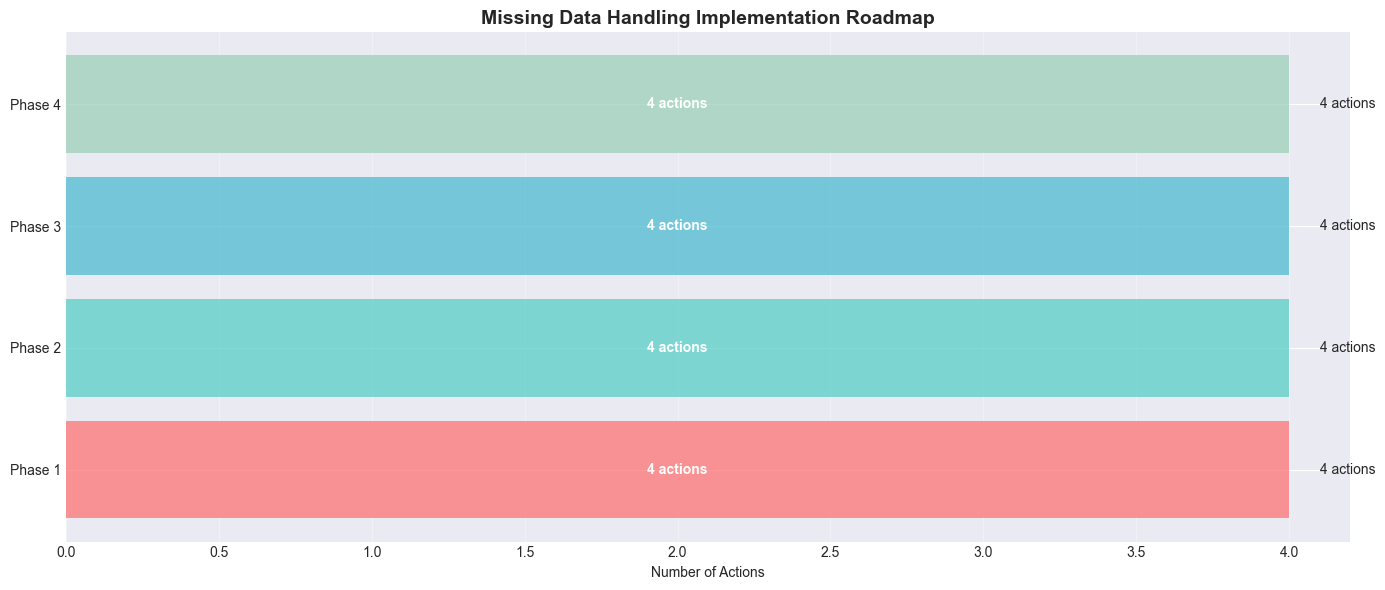

In [17]:
# %%
print("="*80)
print("IMPLEMENTATION PLAN FOR TASK 3")
print("="*80)

# Create detailed implementation plan
implementation_plan = {
    'Phase 1 - Immediate Actions (Week 1)': [
        'Drop features with >50% missing values',
        'Implement mean/median imputation for features with <5% missing',
        'Create missing data indicators for critical features',
        'Document all imputation decisions'
    ],
    'Phase 2 - Advanced Imputation (Week 2)': [
        'Implement KNN imputation for numeric features (5-20% missing)',
        'Use mode imputation for categorical features (<20% missing)',
        'Apply regression imputation for MAR features',
        'Validate imputation accuracy with cross-validation'
    ],
    'Phase 3 - Complex Cases (Week 3)': [
        'Implement MICE for features with 20-30% missing',
        'Consider dropping features with >30% missing if not critical',
        'Perform sensitivity analysis for MNAR features',
        'Create multiple imputed datasets for robust modeling'
    ],
    'Phase 4 - Validation & Monitoring (Ongoing)': [
        'Validate imputation impact on model performance',
        'Establish data quality monitoring dashboard',
        'Set up automated missing data alerts',
        'Create compliance documentation for Basel II'
    ]
}

print(f"\n📅 IMPLEMENTATION ROADMAP:")
print("-" * 60)

for phase, actions in implementation_plan.items():
    print(f"\n{phase}:")
    for action in actions:
        print(f"  • {action}")

# Create Gantt chart style visualization
fig, ax = plt.subplots(figsize=(14, 6))

# Define phases and durations
phases = list(implementation_plan.keys())
durations = [len(actions) for actions in implementation_plan.values()]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Create bars
y_pos = np.arange(len(phases))
bars = ax.barh(y_pos, durations, color=colors, alpha=0.7)

# Add labels
for i, (bar, phase_actions) in enumerate(zip(bars, implementation_plan.values())):
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
           f'{width} actions', va='center')
    
    # Add action count inside bar
    ax.text(width/2, bar.get_y() + bar.get_height()/2,
           f'{len(phase_actions)} actions', ha='center', va='center',
           color='white', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels([p.split(' - ')[0] for p in phases])
ax.set_xlabel('Number of Actions')
ax.set_title('Missing Data Handling Implementation Roadmap', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
save_path = '../../reports/task2_eda/visualizations/missing_values/'
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, 'implementation_roadmap.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 10. Export Analysis Results

In [18]:
# %%
print("="*80)
print("EXPORTING MISSING VALUES ANALYSIS RESULTS")
print("="*80)

# Create results directory
import os
os.makedirs('../../reports/task2_eda/data_quality', exist_ok=True)
os.makedirs('../../reports/task2_eda/recommendations', exist_ok=True)

# Export missing statistics
missing_stats.to_csv('../../reports/task2_eda/data_quality/missing_statistics.csv', index=False)
print(f"✅ Exported missing statistics: ../../reports/task2_eda/data_quality/missing_statistics.csv")

# Export imputation recommendations
imputation_df = pd.DataFrame(imputation_recommendations)
imputation_df.to_csv('../../reports/task2_eda/recommendations/imputation_recommendations.csv', index=False)
print(f"✅ Exported imputation recommendations: ../../reports/task2_eda/recommendations/imputation_recommendations.csv")

# Export impact analysis
impact_df = pd.DataFrame(impact_results['high_impact_features'] + 
                        impact_results['medium_impact_features'] + 
                        impact_results['low_impact_features'])
impact_df.to_csv('../../reports/task2_eda/data_quality/impact_analysis.csv', index=False)
print(f"✅ Exported impact analysis: ../../reports/task2_eda/data_quality/impact_analysis.csv")

# Generate comprehensive report
report = f"""
MISSING VALUES ANALYSIS REPORT - Bati Bank Credit Risk Modeling
Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
Dataset: {len(df):,} transactions, {len(df.columns)} features

EXECUTIVE SUMMARY:
• Overall data completeness: {100 - (df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.1f}%
• Features with missing data: {len(missing_stats[missing_stats['missing_percentage'] > 0])}
• Basel II compliance score: {compliance_score:.1f}%

CRITICAL FINDINGS:
1. High Missing Features: {len(missing_stats[missing_stats['missing_percentage'] > 30])} features with >30% missing
2. MNAR Suspects: {len(mechanism_results['mnar_suspects'])} features with Missing Not At Random pattern
3. High Impact Features: {len(impact_results['high_impact_features'])} features significantly impact modeling

KEY RECOMMENDATIONS:
1. Immediate Action: Address {len(missing_stats[missing_stats['missing_percentage'] > 50])} features with >50% missing
2. Advanced Imputation: Implement MICE for {len(missing_stats[(missing_stats['missing_percentage'] > 20) & (missing_stats['missing_percentage'] <= 30)])} features
3. Validation Required: {len(impact_results['high_impact_features'])} high-impact features need special attention

BASEL II COMPLIANCE STATUS: {'COMPLIANT' if compliance_score >= 75 else 'PARTIALLY COMPLIANT' if compliance_score >= 50 else 'NON-COMPLIANT'}

NEXT STEPS FOR TASK 3:
• Implement Phase 1 actions immediately
• Validate imputation methods before model training
• Document all decisions for regulatory compliance
• Monitor data quality throughout model lifecycle
"""

# Save report
with open('../../reports/task2_eda/recommendations/missing_values_analysis_summary.md', 'w') as f:
    f.write(report)

print(f"✅ Exported summary report: ../../reports/task2_eda/recommendations/missing_values_analysis_summary.md")

print("\n" + "="*80)
print("✅ MISSING VALUES ANALYSIS COMPLETE!")
print("📊 Results exported to ../../reports/task2_eda/")
print("🚀 Proceed to Notebook 6: Outlier Detection")
print("="*80)

EXPORTING MISSING VALUES ANALYSIS RESULTS
✅ Exported missing statistics: ../../reports/task2_eda/data_quality/missing_statistics.csv
✅ Exported imputation recommendations: ../../reports/task2_eda/recommendations/imputation_recommendations.csv
✅ Exported impact analysis: ../../reports/task2_eda/data_quality/impact_analysis.csv
✅ Exported summary report: ../../reports/task2_eda/recommendations/missing_values_analysis_summary.md

✅ MISSING VALUES ANALYSIS COMPLETE!
📊 Results exported to ../../reports/task2_eda/
🚀 Proceed to Notebook 6: Outlier Detection
